In [ ]:
# https://www.youtube.com/watch?v=dcDQCarn6qg

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [2]:
x = np.array([-100, 280, -290, 23, 101, 110])
y = np.array([56, 100, 590, 470, 200, 25])
phi = np.array([29.3, 21.0, 19.2, 29.1, 21.9, 23.1])

In [3]:
phi.mean()

23.933333333333334

Text(0.5, 1.0, 'Measured Porosity')

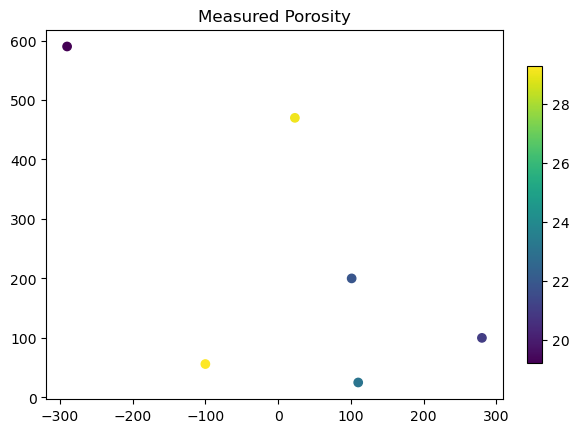

In [4]:
cax = plt.scatter(x, y, c=phi)
cbar = plt.colorbar(cax, fraction=0.03)
plt.title('Measured Porosity')

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 25.567124145124943
Full Sill: 25.567125102372326
Range: 308.56997135302305
Nugget: 9.572473836467138e-07 



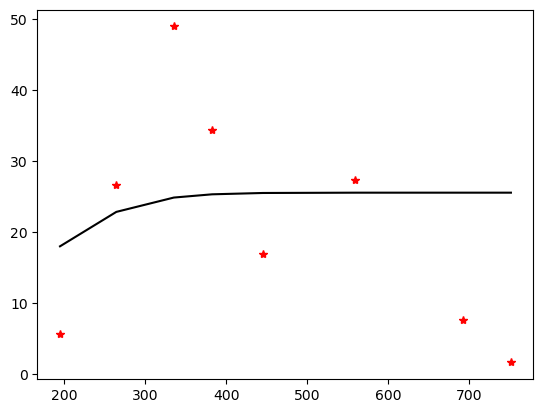

Calculating statistics on variogram model fit...


In [5]:
OK = OrdinaryKriging(
    x, 
    y, 
    phi, 
    variogram_model='gaussian',
    verbose=True,
    enable_plotting=True,
    nlags=10,
)

In [6]:
OK.variogram_model_parameters

array([2.55671241e+01, 3.08569971e+02, 9.57247384e-07])

In [7]:
gridx = np.arange(-300, 300, 10, dtype='float64')
gridy = np.arange(0, 600, 10, dtype='float64')
zstar, ss = OK.execute("grid", gridx, gridy)

Executing Ordinary Kriging...



In [8]:
print(zstar.shape)
print(ss.shape)

(60, 60)
(60, 60)


Text(0.5, 1.0, 'Porosity estimate')

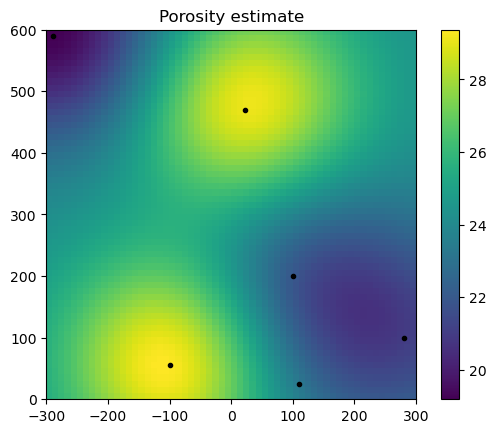

In [9]:
cax = plt.imshow(zstar, extent=(-300, 300, 0, 600), origin='lower')
plt.scatter(x, y, c='k', marker='.')
cbar=plt.colorbar(cax)
plt.title('Porosity estimate')

/var/folders/xt/52zb2sgj4q9f84tyf9cg1yf00000gn/T/ipykernel_9733/1181269959.py:1: RuntimeWarning: invalid value encountered in sqrt
  cax = plt.imshow(np.sqrt(ss), extent=(-300, 300, 0, 600), origin='lower', vmin = 0)


Text(0.5, 1.0, 'Porosity standard devation')

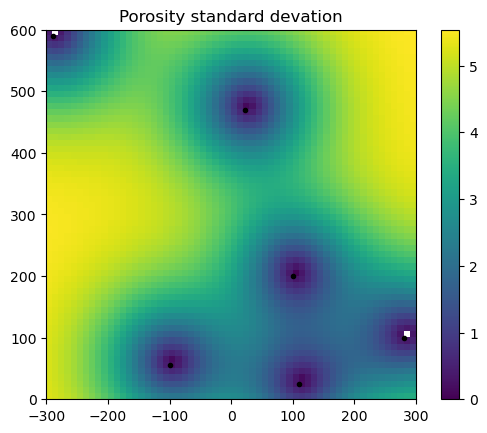

In [10]:
cax = plt.imshow(np.sqrt(ss), extent=(-300, 300, 0, 600), origin='lower', vmin = 0)
plt.scatter(x, y, c='k', marker='.')
cbar=plt.colorbar(cax)
plt.title('Porosity standard devation')

In [11]:
OK.variogram_model_parameters

array([2.55671241e+01, 3.08569971e+02, 9.57247384e-07])